In [31]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 10))

macrodata.csv 파일을 이용하여:

1. 년도별 분기로 datetimeIndex를 생성하고
 - index = pd.DatetimeIndex(['1Q1959', '2Q1959'])

2. realgdp, realcons, realdpi 변수에 대해
 - rolling을 통해 4개 분기에 대한 평균에 대한 그래프를 그려라.
 - ewm을 통해 span=6의 Window 객체를 생성하고 평균에 대한 그래프를 그려라.

3. rolling을 통해 년도별 Window 객체를 생성하고,
 - 4개 분기에 최대값과 최소값의 차이를 생성하는 함수를 작성하라.
 - 이 함수를 apply 메소드를 적용하여 
 - minmax 데이터프레임을 만들고 그려라.

In [2]:
data = pd.read_csv('../examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [9]:
dq, dy = data.quarter.tolist(), data.year.tolist()
yq = [str(int(q))+"Q"+str(int(y)) for q, y in zip(dq, dy)]

In [32]:
index = pd.to_datetime(yq)
index

DatetimeIndex(['1959-01-01', '1959-04-01', '1959-07-01', '1959-10-01',
               '1960-01-01', '1960-04-01', '1960-07-01', '1960-10-01',
               '1961-01-01', '1961-04-01',
               ...
               '2007-04-01', '2007-07-01', '2007-10-01', '2008-01-01',
               '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01',
               '2009-04-01', '2009-07-01'],
              dtype='datetime64[ns]', length=203, freq=None)

In [14]:
newd = data[['realgdp', 'realcons', 'realdpi']]

In [15]:
newd.index = index

In [33]:
newd.head()

,realgdp,realcons,realdpi
1959-01-01,2710.349,1707.4,1886.9
1959-04-01,2778.801,1733.7,1919.7
1959-07-01,2775.488,1751.8,1916.4
1959-10-01,2785.204,1753.7,1931.3
1960-01-01,2847.699,1770.5,1955.5


In [1]:
rwin = newd.rolling(4)

NameError: name 'newd' is not defined

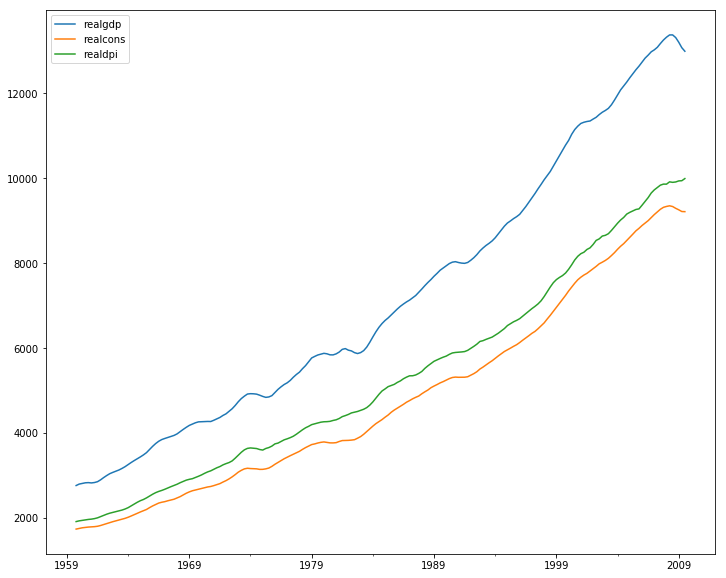

In [35]:
rwin.mean().plot()

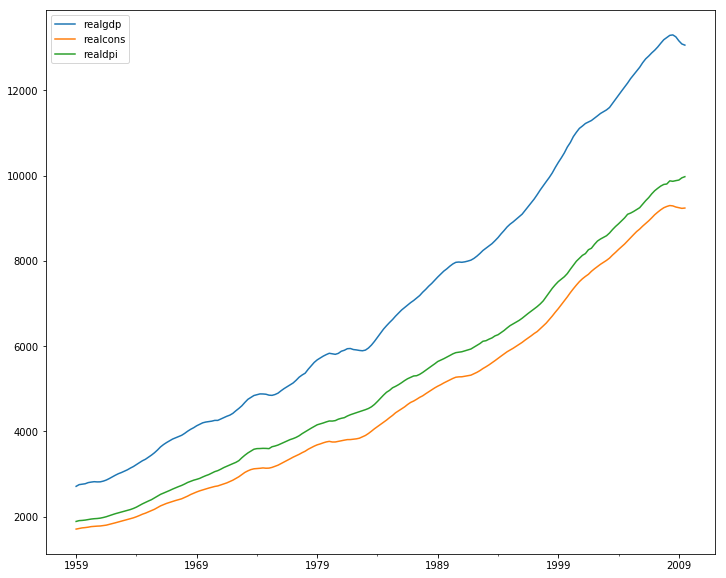

In [34]:
newd.ewm(span=6).mean().plot()

In [36]:
def drange(x): 
    return x.max() - x.min()

In [37]:
minmax = rwin.apply(drange)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


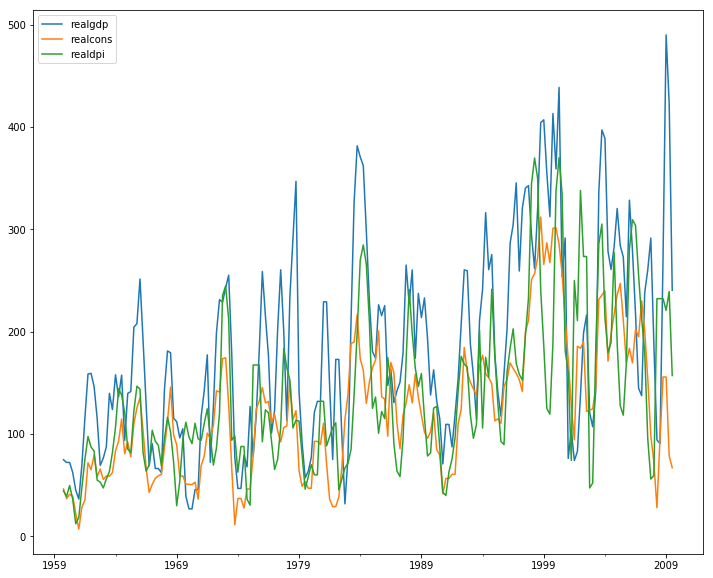

In [38]:
minmax.plot()

DatetimeIndex와 PeriodIndex간의 전환

In [24]:
idx = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
idx

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [39]:
dt_idx = idx.astype('datetime64[ns]')
dt_idx

DatetimeIndex(['1959-01-01', '1959-04-01', '1959-07-01', '1959-10-01',
               '1960-01-01', '1960-04-01', '1960-07-01', '1960-10-01',
               '1961-01-01', '1961-04-01',
               ...
               '2007-04-01', '2007-07-01', '2007-10-01', '2008-01-01',
               '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01',
               '2009-04-01', '2009-07-01'],
              dtype='datetime64[ns]', length=203, freq='QS-OCT')

In [40]:
dt_idx.to_period(freq='Q-DEC')

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')